In [1]:
import sys
import os
sys.path.insert(0, '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter/PyEnergyDiagram/')
sys.path.insert(0, '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter')

import cantera as ct
from IPython.display import Image
%matplotlib inline
from subprocess import run
from pathlib import Path


import pes_plot
import numpy as np
import collections
import warnings
import matplotlib.pyplot as plt
import re
warnings.filterwarnings('ignore')
import pandas as pd

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/cantera/__init__.py


In [2]:
yml_path = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/1.0_c-5.50o-3.25/cantera.yaml'
pes_plot_1 = pes_plot.pes_plot(yml_path, 800, ct.one_atm)
pes_plot_1.surf.TP=800,ct.one_atm

In [10]:
# read the reaction net of progress
df = pd.read_csv('rxnpath/net_rates_0.6.csv')
net_progress = np.array(df.iloc[0:,1])
df_bm = pd.read_csv('/work/westgroup/chao/bm_project/base_bm/binding_energies/52.0_c-6.75o-4.75/rxnpath/net_rates_0.6.csv')
net_progress_bm = np.array(df_bm.iloc[0:,1])

In [7]:
rxnpath = [['CH4(2)', 'CH4X(24)'], ['CH4X(24)', 'CH3X(27)'], ['CH3X(27)', 'CH2X(26)'], ['CH2X(26)', 'CHX(28)'], ['CHX(28)', 'CX(29)'], ['CX(29)', 'COX(23)'], ['COX(23)', 'CO2X(22)']]

rxn_path_ids = []
for rxns in rxnpath:
    ids = []
    for i , v in enumerate(pes_plot_1.surf.reactions()):
        if rxns[0] in v.reactants.keys() and rxns[1] in v.products.keys():
            # print(v)
            # print(pes_plot_1.surf.forward_rate_constants[i])
            # rxns.append(pes_plot_1.surf.forward_rate_constants[i])
            ids.append(i)
        elif rxns[0] in v.products.keys() and rxns[1] in v.reactants.keys():
            # print(v)
            # print(pes_plot_1.surf.reverse_rate_constants[i])
            # rxns.append(pes_plot_1.surf.reverse_rate_constants[i])
            ids.append(i)
    rxn_path_ids.append(ids)
# print(pes_plot_1.surf.reaction(ids[rxns.index(max(rxns))]))
# pes_plot_1.surf.forward_rate_constants[6]

['CH4(2)', 'CH4X(24)']
CH4(2) + X(1) <=> CH4X(24)


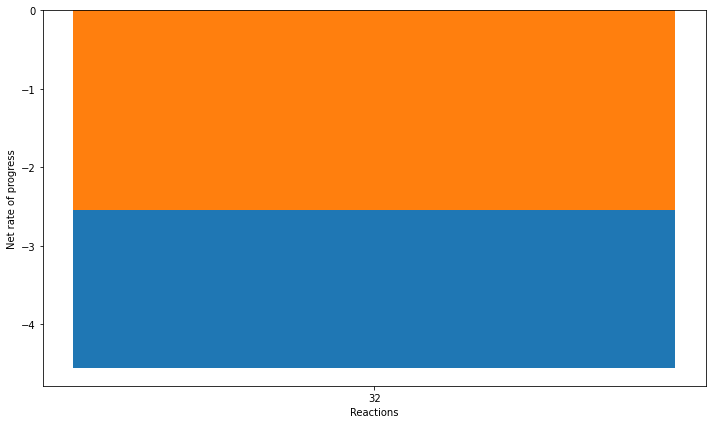

['CH4X(24)', 'CH3X(27)']
CH4X(24) + X(1) <=> CH3X(27) + HX(21)
CH3X(27) + H2X(30) <=> CH4X(24) + HX(21)
CH4X(24) + COX(23) <=> CH3X(27) + CHOX(33)
CH4X(24) + OX(25) <=> CH3X(27) + OHX(31)
CH2X(26) + CH4X(24) <=> 2 CH3X(27)
CH4X(24) + CHX(28) <=> CH2X(26) + CH3X(27)
CH4X(24) + CX(29) <=> CH3X(27) + CHX(28)
CH4X(24) + OHX(31) <=> CH3X(27) + H2OX(32)
CH3X(27) + H2OX(32) <=> CH4X(24) + OHX(31)
CH2O_X(46) + CH3X(27) <=> CH4X(24) + CHOX(33)
CH2O_X(46) + CH4X(24) <=> CH3O_X(45) + CH3X(27)


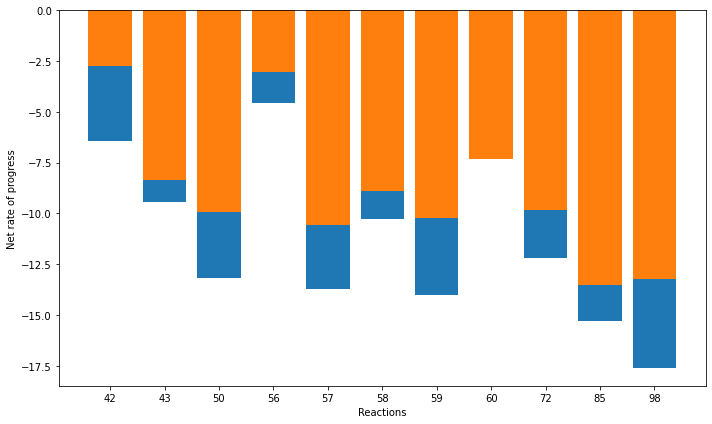

['CH3X(27)', 'CH2X(26)']
CH2X(26) + HX(21) <=> CH3X(27) + X(1)
CH3X(27) + OX(25) <=> CH2X(26) + OHX(31)
CH2X(26) + H2OX(32) <=> CH3X(27) + OHX(31)
CH2X(26) + H2X(30) <=> CH3X(27) + HX(21)
CH2X(26) + CHOX(33) <=> CH3X(27) + COX(23)
CH2X(26) + CH4X(24) <=> 2 CH3X(27)
2 CH2X(26) <=> CH3X(27) + CHX(28)
CH3X(27) + CX(29) <=> CH2X(26) + CHX(28)
CH2O_X(46) + CH2X(26) <=> CH3X(27) + CHOX(33)
CH2O_X(46) + CH3X(27) <=> CH2X(26) + CH3O_X(45)


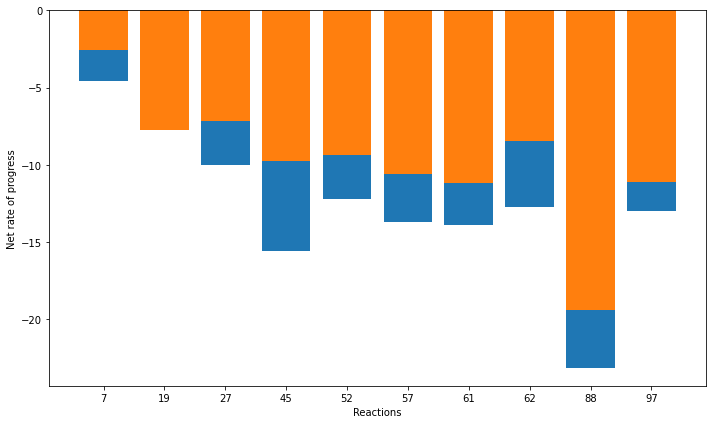

['CH2X(26)', 'CHX(28)']
CHX(28) + HX(21) <=> CH2X(26) + X(1)
CHX(28) + OHX(31) <=> CH2X(26) + OX(25)
CHX(28) + H2OX(32) <=> CH2X(26) + OHX(31)
CHX(28) + H2X(30) <=> CH2X(26) + HX(21)
CHOX(33) + CHX(28) <=> CH2X(26) + COX(23)
CH4X(24) + CHX(28) <=> CH2X(26) + CH3X(27)
2 CH2X(26) <=> CH3X(27) + CHX(28)
CH2X(26) + CX(29) <=> 2 CHX(28)
CH2O_X(46) + CHX(28) <=> CH2X(26) + CHOX(33)
CH2O_X(46) + CH2X(26) <=> CH3O_X(45) + CHX(28)


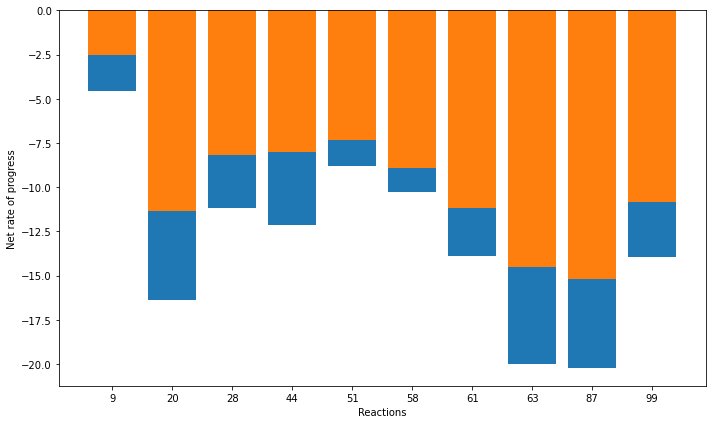

['CHX(28)', 'CX(29)']
CHX(28) + X(1) <=> CX(29) + HX(21)
CX(29) + OHX(31) <=> CHX(28) + OX(25)
CX(29) + H2OX(32) <=> CHX(28) + OHX(31)
CX(29) + H2X(30) <=> CHX(28) + HX(21)
CHOX(33) + CX(29) <=> CHX(28) + COX(23)
CH4X(24) + CX(29) <=> CH3X(27) + CHX(28)
CH3X(27) + CX(29) <=> CH2X(26) + CHX(28)
CH2X(26) + CX(29) <=> 2 CHX(28)
CH2O_X(46) + CX(29) <=> CHOX(33) + CHX(28)
CH2O_X(46) + CHX(28) <=> CH3O_X(45) + CX(29)


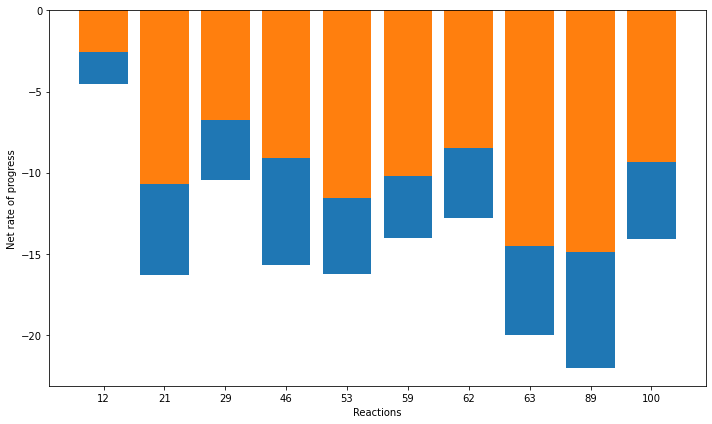

['CX(29)', 'COX(23)']
CX(29) + OX(25) <=> COX(23) + X(1)
2 COX(23) <=> CO2X(22) + CX(29)
COX(23) + HX(21) <=> CX(29) + OHX(31)
CHOX(33) + CX(29) <=> CHX(28) + COX(23)


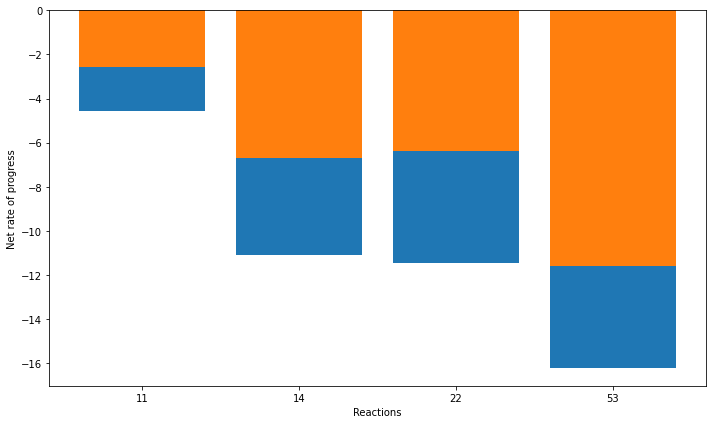

['COX(23)', 'CO2X(22)']
COX(23) + OX(25) <=> CO2X(22) + X(1)
2 COX(23) <=> CO2X(22) + CX(29)
CO2X(22) + HX(21) <=> COX(23) + OHX(31)


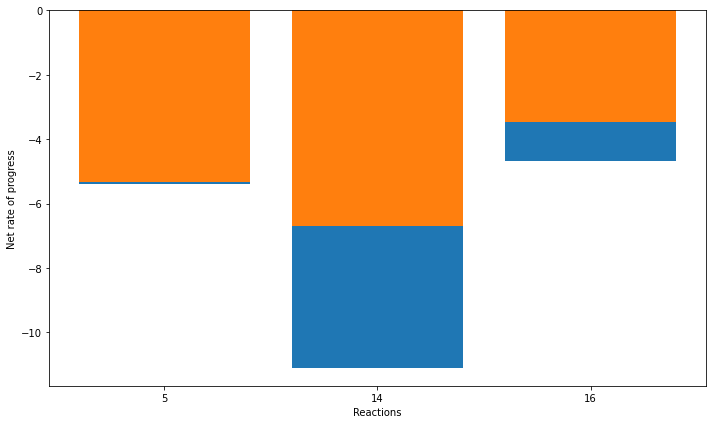

In [12]:
for i in range(len(rxnpath)):
    print(rxnpath[i])
    reactions = []
    rates = []
    rates_bm = []
    for j in rxn_path_ids[i]:
        print(pes_plot_1.surf.reaction(j))
        # reactions.append(pes_plot_1.surf.reaction(j))
        reactions.append(str(j))
        rates.append(net_progress[j])
        rates_bm.append(net_progress_bm[j])

    # Create a bar chart using matplotlib
    # print(reactions)
    # print(rates)
    # print(np.log(np.array(rates)))
    plt.figure(figsize=(10, 6))
    plt.bar(reactions, np.log10(np.abs(np.array(rates))))
    plt.bar(reactions, np.log10(np.abs(np.array(rates_bm))))

    # Add labels and title
    plt.xlabel('Reactions')
    plt.ylabel('Net rate of progress')
    # plt.title('Bar Chart Example')
    plt.tight_layout()
    # Display the chart
    plt.show()